## Hologram reconstruction code

In [11]:
import utilities as ut
import numpy as np
import matplotlib.pyplot as plt

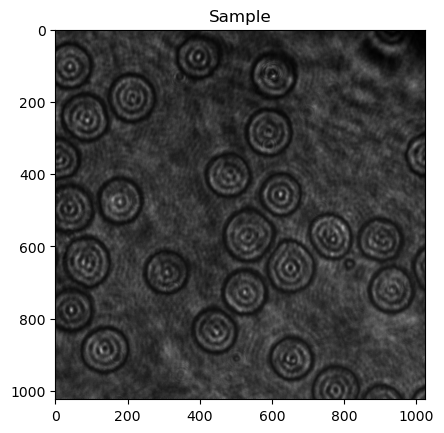

In [2]:
# Lines to read the hologram
hologram = ut.imageRead('holo-RBC-20p205-2-3.png')
ut.imageShow(hologram, 'Sample')

width, height = (np.array(hologram)).shape

In [3]:
# Parameters of reconstruction (everything must be same units)
wavelength = 0.532
dxy = 2.4
distance = 0

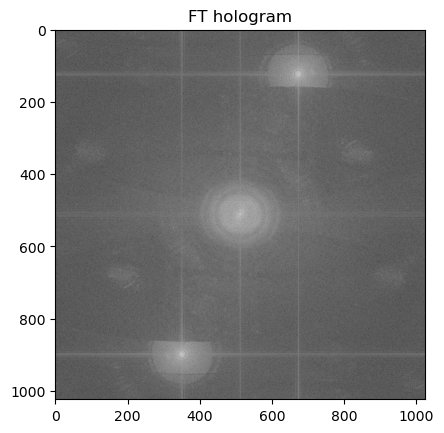

In [4]:
# Compute the FT of the hologram
ft_holo = ut.ft(hologram)
ut.imageShow(ut.intensity(ft_holo, True), 'FT hologram')

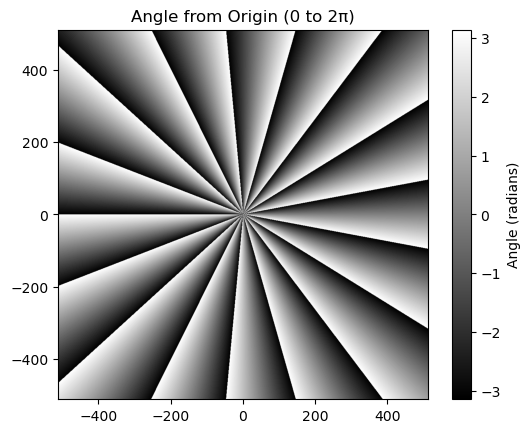

In [5]:
# Define the size of the image
size = width 

# Generate a grid of x and y coordinates
y, x = np.ogrid[-size//2:size//2, -size//2:size//2]

# Compute the angle from the origin in radians, and wrap it to the range [0, 2π]
angle = np.arctan2(y, x)  # Angle in radians from -π to π
l = 17
vortex = np.exp(1j * l * angle)

# Plot the result
plt.imshow(np.angle(vortex), cmap='gray', extent=(-size//2, size//2, -size//2, size//2))
plt.colorbar(label="Angle (radians)")
plt.title("Angle from Origin (0 to 2π)")
plt.show()

In [6]:
ft_vortex = ut.ft(vortex)

#plt.imshow(np.angle(ft_vortex, True), cmap='grey', extent=(-size//2, size//2, -size//2, size//2))


Text(0.5, 1.0, 'Hologram and vortex convolution in spectra')

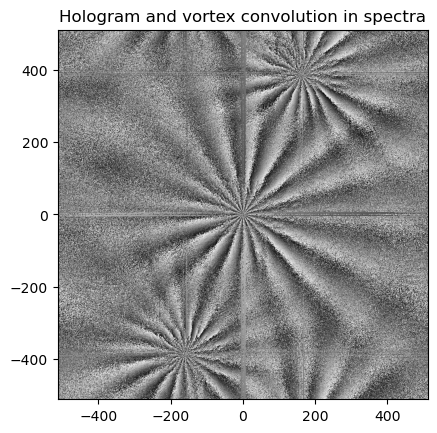

In [7]:
conv = (hologram * vortex)
ift_conv = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(conv)))


plt.imshow(np.angle(ift_conv, True), cmap='grey', extent=(-size//2, size//2, -size//2, size//2))
plt.title("Hologram and vortex convolution in spectra")

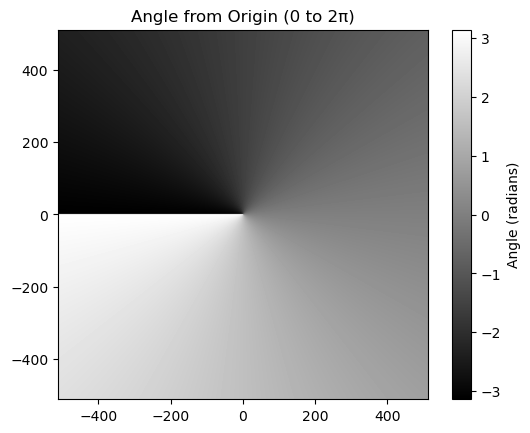

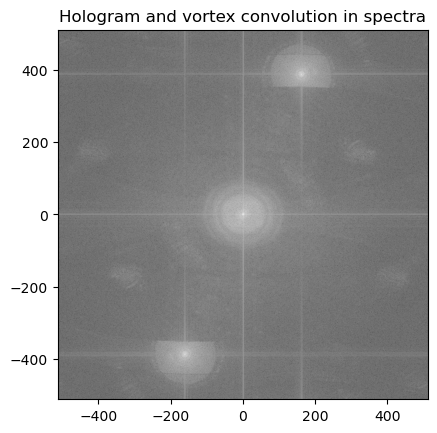

In [8]:
hey = ut.vortexConvolution(hologram, l_vortex= 1, plot = True)

In [12]:
# numerical reconstruction with vortex
complexObject = ut.reconstruction_vortex(hologram, wavelength, dxy, 500, l_vortex = 2)
amplitude = ut.amplitude(complexObject, False)
phase = ut.phase(complexObject)
ut.imageShow(amplitude, 'Amplitude')
ut.imageShow(phase, 'Phase')

Spatial filtering process started.....
Spatial filtering process finished.
Minimization process started.....
Minimization process finished. Cost function value =        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.6690898152656595
             x: [ 3.520e+02  8.990e+02]
           nit: 6
          nfev: 14
 final_simplex: (array([[ 3.520e+02,  8.990e+02],
                       [ 3.520e+02,  8.990e+02],
                       [ 3.520e+02,  8.990e+02]]), array([ 1.669e+00,  1.669e+00,  1.669e+00]))
fx:  352.0
fy:  899.0
Phase compensation started....


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [10]:
# numerical reconstruction with vortex
complexObject = ut.reconstruction(hologram, wavelength, dxy, 500)
amplitude = ut.amplitude(complexObject, False)
phase = ut.phase(complexObject)
ut.imageShow(amplitude, 'Amplitude')
ut.imageShow(phase, 'Phase')

Spatial filtering process started.....
Spatial filtering process finished.
Minimization process started.....
Minimization process finished. Cost function value =        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.033858562183935
             x: [ 3.507e+02  8.995e+02]
           nit: 131
          nfev: 262
 final_simplex: (array([[ 3.507e+02,  8.995e+02],
                       [ 3.507e+02,  8.995e+02],
                       [ 3.507e+02,  8.995e+02]]), array([ 1.034e+00,  1.034e+00,  1.034e+00]))
fx:  350.68745056287423
fy:  899.4576458350195
Phase compensation started....


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.